In [1]:
import os
import pandas as pd

In [121]:
# folder_path = '/home/youwombat/202205-House-Search/Large Datasets/'  # Replace with your folder path
folder_path = '/home/youwombat/202205-House-Search/Large Datasets/Cherrybrook free standing'  # Replace with your folder path
# folder_path = '/home/youwombat/202205-House-Search/Large Datasets/Ryde semi'  # Replace with your folder path
# folder_path = '/home/youwombat/202205-House-Search/Large Datasets/Castle Hill R2 just outside R3'  # Replace with your folder path
# folder_path = '/home/youwombat/202205-House-Search/Large Datasets/Castle Hill R3'
# folder_path = '/home/youwombat/202205-House-Search/Large Datasets/Peartree WPH'
# folder_path = '/home/youwombat/202205-House-Search/Large Datasets/Town house next to Peartree'
# folder_path = '/home/youwombat/202205-House-Search/Large Datasets/The Glade WPH'
# folder_path = '/home/youwombat/202205-House-Search/Large Datasets/Cherrybrook duplexes'

combined_data = pd.DataFrame()

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)  # Read each CSV file
        combined_data = pd.concat([combined_data, df], ignore_index=True)

In [122]:
pd.options.display.max_rows = 150
# combined_data.to_excel('/home/youwombat/202205-House-Search/Large Datasets/Peartree.xlsx', index=False)

In [123]:
combined_data['sale_dt'] = pd.to_datetime(combined_data['SALE DATE'])
# Analysis 1 - Look at overall min max
# No action required
# Analysis 2 - Only look post 2015
import datetime
from datetime import date
dtm = datetime.datetime(2010, 1, 1, 0, 0, 0, 000000)
combined_data = combined_data[combined_data['sale_dt']>=dtm]
combined_data

,ADDRESS,SALE PRICE,SALE DATE,AREA,STRATA/NON STRATA,MULTI-PROPERTY SALE (Y/N),PROPERTY NUMBER,DEALING NUMBER,EXTRACTION DATE,sale_dt
4,"72 DARLINGTON DRIVE, CHERRYBROOK NSW 2126",2080000,14 January 2023,796.4,NON STRATA,No,636947,AS855613,16 July 2023,2023-01-14
5,"72 DARLINGTON DRIVE, CHERRYBROOK NSW 2126",2100000,13 May 2021,796.4,NON STRATA,No,636947,AR334574,16 July 2023,2021-05-13
7,"6 CANNAN CLOSE, CHERRYBROOK NSW 2126",2150000,3 May 2017,751.3,NON STRATA,No,632744,AM511727,16 July 2023,2017-05-03
10,"10 BOWEN CLOSE, CHERRYBROOK NSW 2126",1370000,26 January 2014,993.6,NON STRATA,No,630331,AI554236,16 July 2023,2014-01-26
12,"7 CANNAN CLOSE, CHERRYBROOK NSW 2126",1140000,3 April 2012,802.3,NON STRATA,No,632729,AH185593,16 July 2023,2012-04-03
14,"17 CHISWICK PLACE, CHERRYBROOK NSW 2126",2875000,10 May 2022,743.8,NON STRATA,No,634710,AS234490,16 July 2023,2022-05-10
17,"20 CANNAN CLOSE, CHERRYBROOK NSW 2126",1910000,2 November 2015,693.7,NON STRATA,No,632737,AK180368,16 July 2023,2015-11-02
21,"3 BOWEN CLOSE, CHERRYBROOK NSW 2126",2480000,15 September 2022,765.2,NON STRATA,No,630290,AS627739,16 July 2023,2022-09-15
24,"12 CANNAN CLOSE, CHERRYBROOK NSW 2126",2000000,17 November 2017,742.0,NON STRATA,No,632741,AN29961,16 July 2023,2017-11-17
25,"12 CANNAN CLOSE, CHERRYBROOK NSW 2126",1537000,15 November 2014,742.0,NON STRATA,No,632741,AJ233609,16 July 2023,2014-11-15


In [124]:
pd.options.display.max_rows = 25
df_max_dates = combined_data.sort_values('sale_dt').drop_duplicates('ADDRESS', keep='last')
df_min_dates = combined_data.sort_values('sale_dt').drop_duplicates('ADDRESS', keep='first')
df_max_dates
df_min_dates

df2 = df_min_dates.merge(df_max_dates, on='ADDRESS')
df2



,ADDRESS,SALE PRICE_x,SALE DATE_x,AREA_x,STRATA/NON STRATA_x,MULTI-PROPERTY SALE (Y/N)_x,PROPERTY NUMBER_x,DEALING NUMBER_x,EXTRACTION DATE_x,sale_dt_x,SALE PRICE_y,SALE DATE_y,AREA_y,STRATA/NON STRATA_y,MULTI-PROPERTY SALE (Y/N)_y,PROPERTY NUMBER_y,DEALING NUMBER_y,EXTRACTION DATE_y,sale_dt_y
0,"3 CANNAN CLOSE, CHERRYBROOK NSW 2126",1138000,5 October 2011,810.8,NON STRATA,No,632727,AG674206,16 July 2023,2011-10-05,1138000,5 October 2011,810.8,NON STRATA,No,632727,AG674206,16 July 2023,2011-10-05
1,"10 DARLINGTON DRIVE, CHERRYBROOK NSW 2126",892500,18 March 2012,745.8,NON STRATA,No,636986,AG940419,16 July 2023,2012-03-18,1780000,22 April 2020,745.8,NON STRATA,No,636986,AQ147062,16 July 2023,2020-04-22
2,"7 CANNAN CLOSE, CHERRYBROOK NSW 2126",1140000,3 April 2012,802.3,NON STRATA,No,632729,AH185593,16 July 2023,2012-04-03,1140000,3 April 2012,802.3,NON STRATA,No,632729,AH185593,16 July 2023,2012-04-03
3,"10 BOWEN CLOSE, CHERRYBROOK NSW 2126",1370000,26 January 2014,993.6,NON STRATA,No,630331,AI554236,16 July 2023,2014-01-26,1370000,26 January 2014,993.6,NON STRATA,No,630331,AI554236,16 July 2023,2014-01-26
4,"12 CANNAN CLOSE, CHERRYBROOK NSW 2126",1537000,15 November 2014,742.0,NON STRATA,No,632741,AJ233609,16 July 2023,2014-11-15,2000000,17 November 2017,742.0,NON STRATA,No,632741,AN29961,16 July 2023,2017-11-17
5,"20 CANNAN CLOSE, CHERRYBROOK NSW 2126",1910000,2 November 2015,693.7,NON STRATA,No,632737,AK180368,16 July 2023,2015-11-02,1910000,2 November 2015,693.7,NON STRATA,No,632737,AK180368,16 July 2023,2015-11-02
6,"6 CANNAN CLOSE, CHERRYBROOK NSW 2126",2150000,3 May 2017,751.3,NON STRATA,No,632744,AM511727,16 July 2023,2017-05-03,2150000,3 May 2017,751.3,NON STRATA,No,632744,AM511727,16 July 2023,2017-05-03
7,"72 DARLINGTON DRIVE, CHERRYBROOK NSW 2126",2100000,13 May 2021,796.4,NON STRATA,No,636947,AR334574,16 July 2023,2021-05-13,2080000,14 January 2023,796.4,NON STRATA,No,636947,AS855613,16 July 2023,2023-01-14
8,"17 CHISWICK PLACE, CHERRYBROOK NSW 2126",2875000,10 May 2022,743.8,NON STRATA,No,634710,AS234490,16 July 2023,2022-05-10,2875000,10 May 2022,743.8,NON STRATA,No,634710,AS234490,16 July 2023,2022-05-10
9,"3 BOWEN CLOSE, CHERRYBROOK NSW 2126",2480000,15 September 2022,765.2,NON STRATA,No,630290,AS627739,16 July 2023,2022-09-15,2480000,15 September 2022,765.2,NON STRATA,No,630290,AS627739,16 July 2023,2022-09-15


max_sale_yr
2011    0.000000
2012    0.000000
2014    0.000000
2015    0.000000
2017    0.045771
2020    0.089013
2022    0.000000
2023   -0.005704
Name: real_growth, dtype: float64
max_sale_yr
2011    1
2012    1
2014    1
2015    1
2017    2
2020    1
2022    2
2023    1
Name: real_growth, dtype: int64


<Axes: xlabel='max_sale_yr'>

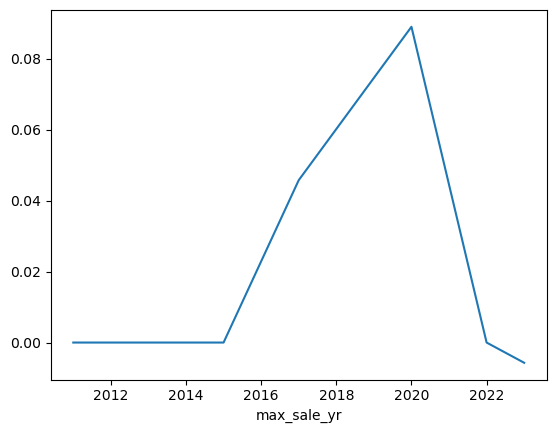

In [126]:
df2['years_diff'] = (df2['sale_dt_y'] - df2['sale_dt_x']).dt.days / 365.25
# nom_growth = (df2['SALE PRICE_y']/df2['SALE PRICE_x']-1)/df2['years_diff']
# nom_growth

df2['real_growth'] = (df2['SALE PRICE_y']/df2['SALE PRICE_x']).pow(1/df2['years_diff']) - 1
df2['max_sale_yr'] = df2['sale_dt_y'].dt.year
print(df2.groupby('max_sale_yr')['real_growth'].mean())
# df2.groupby('max_sale_yr')['years_diff'].mean()
print(df2.groupby('max_sale_yr')['real_growth'].count())

df2.groupby('max_sale_yr')['real_growth'].mean().plot()

